#### Importing required python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Retrieving raw data from feather file

In [2]:
all_data = pd.read_feather(r"/Users/olubusolaagboola/Bussy_Projects/Sales_data.ftr")

In [3]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


#### Checking for nulls and duplicates, then removing them

In [4]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
all_data = all_data.dropna(how="all")

In [6]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [7]:
all_data = all_data.drop_duplicates()

### Analysis of best sales month

In [8]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [9]:
all_data['Order Date'][0]

'04/19/19 08:46'

In [10]:
def return_month(x):
    return x.split('/')[0]

In [11]:
all_data['Month'] = all_data['Order Date'].apply(return_month)

In [12]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [13]:
filter1 = all_data['Month'] == 'Order Date'

In [14]:
all_data = all_data[~filter1]

In [15]:
all_data['Month'] = all_data['Month'].astype(int)

In [16]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [17]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [18]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

<AxesSubplot:xlabel='Month'>

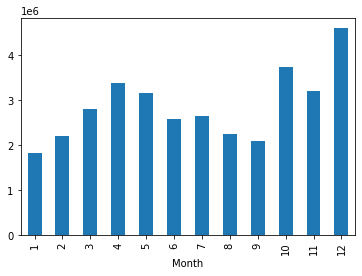

In [19]:
all_data.groupby(['Month'])['Sales'].sum().plot(kind='bar')

The chart above shows that Month 12, which is december, had the highest number of sales. We can conclude that the festive season might have been a huge contributor to the spike in sales experienced in that month!

### Analysis of orders by cities

In [20]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [21]:
all_data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [22]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str.get(1)

In [23]:
pd.value_counts(all_data['City'])

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: City, dtype: int64

<AxesSubplot:ylabel='City'>

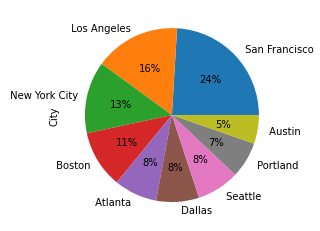

In [24]:
pd.value_counts(all_data['City']).plot(kind='pie', autopct='%1.0f%%')

The chart above shows that the highest number of orders came from San Francisco with a total of 44,662 orders making up 24% of total orders in the country

### Analysis of products that sold the most quantity and why!

In [25]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City'],
      dtype='object')

In [26]:
product_df = all_data.groupby(['Product']).agg({'Quantity Ordered':'sum', 'Price Each':'mean'})

product_df = product_df.reset_index()

In [28]:
product_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [29]:
products = product_df['Product'].values

/var/folders/np/017cxctd3l75wbryg_yvs3h00000gn/T/ipykernel_78607/531698060.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', fontsize=8)


Text(0, 0.5, 'Avg price of product')

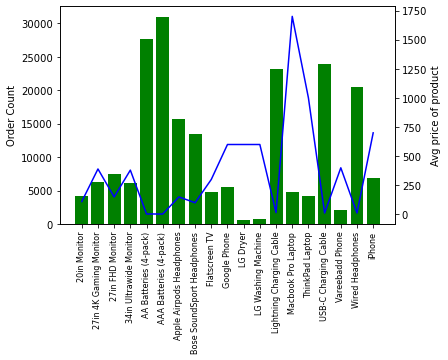

In [31]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(product_df['Product'], product_df['Quantity Ordered'], color='g')
ax2.plot(product_df['Product'], product_df['Price Each'], color='b')

ax1.set_xticklabels(products, rotation='vertical', fontsize=8)

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')

From the chart above, the most sold product is the AAA Batteries(4-pack). Further analysis of the chart shows that it has one of the lowest average prices.
We can therefore conclude that this product sold the highest because of its low price

#### Trend analysis of the most sold products

In [33]:
all_data['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [34]:
most_sold_product = all_data['Product'].value_counts()[0:5].index

In [35]:
most_sold_df = all_data[all_data['Product'].isin(most_sold_product)]

In [37]:
pivot_df = most_sold_df.groupby(['Month', 'Product']).size().unstack()

In [38]:
pivot_df

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<AxesSubplot:xlabel='Month'>

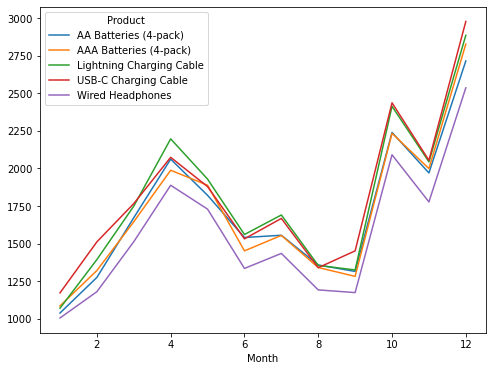

In [39]:
pivot_df.plot(figsize=(8,6))

### Analysis of products often sold together

In [40]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City'],
      dtype='object')

In [41]:
duplicated_df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [43]:
duplicate_products = duplicated_df.groupby(['Order ID'])['Product'].apply(lambda x : ','.join(x)).reset_index().rename(columns={'Product':'Grouped Products'})

In [44]:
duplicate_products

,Order ID,Grouped Products
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [45]:
dup_products_df = duplicated_df.merge(duplicate_products, how='left', on='Order ID')

In [46]:
no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID'])

<AxesSubplot:ylabel='Grouped Products'>

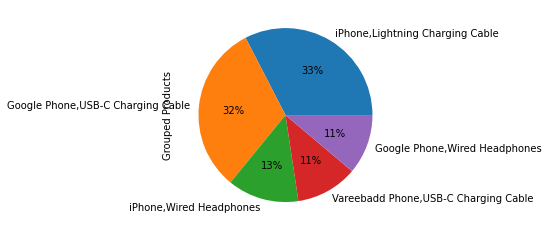

In [47]:
no_dup_df['Grouped Products'].value_counts()[0:5].plot(kind='pie', autopct='%1.0f%%')

The chart above shows the top 5 grouped items often bought together. We can see that the Iphone and lightning charging cable are the products most often bought together. 